# Homework 

* Create derived statistic for slap and backhand shots
* Note, the analysis can be extended beyond the wrist shot model example
* Assess and report the derived statistics across relevant factors

In [152]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# !pip install plotly

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 50)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 2

In [153]:
dm = pandas.read_csv('shots.csv')
dm = dm[(dm['advantagetypeshooter']=='EV')] 
dm = dm[dm['zone']=="O"]

In [154]:
dm.head()

,season,gamenumber,gamedate,vteamcode,hteamcode,eventnumber,period,eventtimefromzero,advantagetypeshooter,advantagetypegoalie,...,position,namegoalie,tgoals,ogoals,zone,X,Y,XNorm,YNorm,shotType
0,2011,20001,10/6/2011,PHI,BOS,4,1,47,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,32,-14,32,-14,Snap
1,2011,20001,10/6/2011,PHI,BOS,9,1,114,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,37,-18,37,-18,Snap
2,2011,20001,10/6/2011,PHI,BOS,14,1,138,EV,EV,...,G,THOMAS_TIM,0,0,O,-50,7,50,-7,Snap
3,2011,20001,10/6/2011,PHI,BOS,25,1,249,EV,EV,...,G,THOMAS_TIM,0,0,O,-48,-5,48,5,Slap
4,2011,20001,10/6/2011,PHI,BOS,29,1,297,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,39,-1,39,-1,Wrist


In [155]:
dm.describe()

,season,gamenumber,eventnumber,period,eventtimefromzero,isTHome,playernumber,tgoals,ogoals,X,Y,XNorm,YNorm
count,57186.0,57186.000000,57186.000000,57186.000000,57186.00000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000
mean,2011.0,20621.982094,154.552303,2.034432,584.16901,0.485433,29.926486,1.304480,1.180569,0.264016,-0.178663,62.067604,-0.376613
std,0.0,354.047357,89.652301,0.850648,346.91897,0.499792,13.608431,1.364192,1.280953,64.288069,19.317856,16.750245,19.315011
min,2011.0,20001.000000,3.000000,1.000000,4.00000,0.000000,1.000000,0.000000,0.000000,-99.000000,-42.000000,26.000000,-42.000000
25%,2011.0,20318.000000,77.000000,1.000000,277.00000,0.000000,30.000000,0.000000,0.000000,-64.000000,-15.000000,49.000000,-15.000000
50%,2011.0,20625.000000,154.000000,2.000000,573.00000,0.000000,31.000000,1.000000,1.000000,28.000000,0.000000,64.000000,-1.000000
75%,2011.0,20928.000000,229.000000,3.000000,885.00000,1.000000,35.000000,2.000000,2.000000,64.000000,14.000000,77.000000,14.000000
max,2011.0,21230.000000,392.000000,4.000000,1200.00000,1.000000,70.000000,9.000000,9.000000,97.000000,42.000000,99.000000,42.000000


In [156]:
dm.groupby(['eventtype'])[['XNorm', 'YNorm']].describe()

XNorm         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      70.962591     -0.132535
          std       13.088705     12.242820
          min       27.000000    -39.000000
          25%       64.000000     -6.000000
          50%       75.000000      0.000000
          75%       81.000000      6.000000
          max       97.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      61.275139     -0.398358
          std       16.811628     19.822985
          min       26.000000    -42.000000
          25%       48.000000    -16.000000
          50%       63.000000     -1.000000
          75%       77.000000     15.000000
          max       99.000000     42.000000

In [157]:
pandas.crosstab(dm['shotType'], dm['eventtype'], margins=True)

eventtype,GOAL,SHOT,All
shotType,,,
Backhand,513,4709,5222
Deflected,172,701,873
Slap,545,10716,11261
Snap,681,7574,8255
Tip-In,432,1927,2359
Wrap-around,49,897,946
Wrist,2286,25984,28270
All,4678,52508,57186


Create Variables

In [158]:
dm['isgoal'] = dm['eventtype']=='GOAL'
dm['XNormAdj'] = 99 - dm['XNorm']
dm.groupby(['eventtype'])[['XNormAdj', 'YNorm']].describe()

XNormAdj         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      28.037409     -0.132535
          std       13.088705     12.242820
          min        2.000000    -39.000000
          25%       18.000000     -6.000000
          50%       24.000000      0.000000
          75%       35.000000      6.000000
          max       72.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      37.724861     -0.398358
          std       16.811628     19.822985
          min        0.000000    -42.000000
          25%       22.000000    -16.000000
          50%       36.000000     -1.000000
          75%       51.000000     15.000000
          max       73.000000     42.000000

In [159]:
dm['XNormAdj'] = dm['XNormAdj'] + 1
dm['YNormAdj'] = numpy.absolute(dm['YNorm'])
dm['YNormAdj'] = dm['YNormAdj'] + 1

dm['lnX'] = numpy.log(dm['XNormAdj'])
dm['lnY'] = numpy.log(dm['YNormAdj'])

dm['dscore'] = dm['tgoals'] - dm['ogoals']
dm['oteamcode'] = dm.apply(lambda x: 1 if (x['teamcode'] == x['hteamcode']) else x['vteamcode'], axis=1)

In [160]:
ss = dm[dm['shotType']=='Slap']
bh = dm[dm['shotType']=='Backhand']
ws = dm[dm['shotType']=='Wrist']

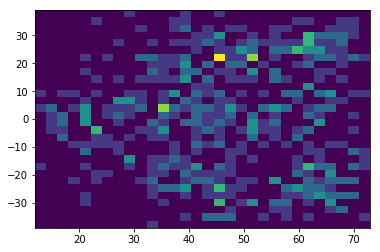

In [161]:
dg = ss[ss['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

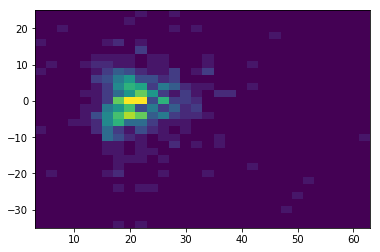

In [162]:
dg = bh[bh['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

Logit model estimation and predictions

    * m1: length
    * m2: width
    * m3: length and width


$$ p_i = \frac{1}{1+exp(-X'\beta)}$$


Model the probability that a shot results in a goal in terms of length.

Optimization terminated successfully.
         Current function value: 0.189648
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


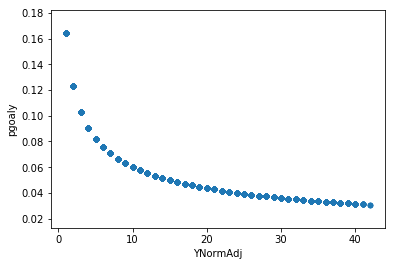

In [163]:
m1 = sm.Logit(ss['isgoal'], sm.add_constant(ss['lnY'])).fit()
m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
ss.ix[:, 'pgoaly'] = m2.predict()
ss.plot(kind='scatter', x='YNormAdj', y='pgoaly')

Optimization terminated successfully.
         Current function value: 0.189648
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


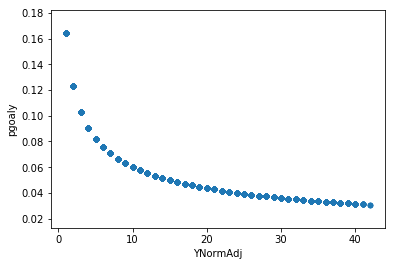

In [164]:
m2 = sm.Logit(ss['isgoal'], sm.add_constant(ss['lnY'])).fit()
m2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
ss.ix[:, 'pgoaly'] = m2.predict()
ss.plot(kind='scatter', x='YNormAdj', y='pgoaly')

In [165]:
m3 = sm.Logit(ss['isgoal'], sm.add_constant(ss[['lnX', 'lnY']])).fit()
m3.get_margeff(method='dydx', at='overall').summary()
ss.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.185000
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Slap Analysis

Width and Length drive down goals of slapshot, however slapshots are generally taken from furthr distances. Slapshots can be scored from many more vantage points that backhand shots as exhibited below in the Backhand analysis and the above heatmap.

Backhand shots

Optimization terminated successfully.
         Current function value: 0.317752
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


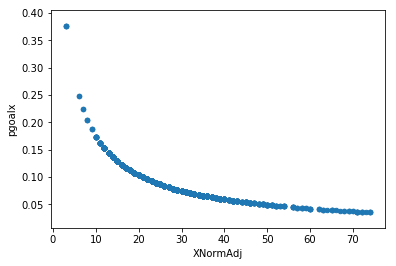

In [166]:
n1 = sm.Logit(bh['isgoal'], sm.add_constant(bh['lnX'])).fit()
n1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
bh.ix[:, 'pgoalx'] = n1.predict()
bh.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Optimization terminated successfully.
         Current function value: 0.301774
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


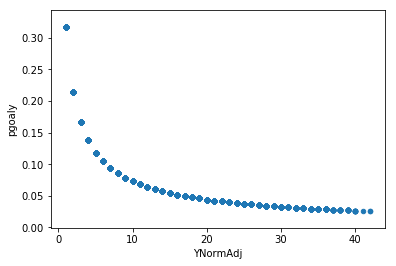

In [167]:
n2 = sm.Logit(bh['isgoal'], sm.add_constant(bh['lnY'])).fit()
n2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
bh.ix[:, 'pgoaly'] = n2.predict()
bh.plot(kind='scatter', x='YNormAdj', y='pgoaly')

In [168]:
n3 = sm.Logit(bh['isgoal'], sm.add_constant(bh[['lnX', 'lnY']])).fit()
n3.get_margeff(method='dydx', at='overall').summary()
bh.ix[:, 'pgoal'] = n3.predict()

Optimization terminated successfully.
         Current function value: 0.297700
         Iterations 7


C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Temp\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Backhand Analysis

#Plot shows that each increase in length and width drove down probablity of a backhand shot being a goal - All shots within 5 feet had voer a 10 percent chance of being a goal. As a sport manager this advises me that backhands should only really be taken when tithin 10 feet of net.